#**Topics extraction from 20 NEWS GROUPS Data**

In [1]:
from sklearn.datasets import fetch_20newsgroups 

In [2]:
groups = fetch_20newsgroups()

##**Thinking about feature**

In [3]:
groups.keys()

dict_keys(['data', 'filenames', 'target_names', 'target', 'DESCR'])

In [4]:
groups['target_names']

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

In [5]:
groups.target

array([7, 4, 4, ..., 3, 1, 8])

In [6]:
import numpy as np

In [7]:
np.unique(groups.target)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19])

**The range from 0-19 represents the 20 topics**

In [ ]:
groups.data[0]

"From: lerxst@wam.umd.edu (where's my thing)\nSubject: WHAT car is this!?\nNntp-Posting-Host: rac3.wam.umd.edu\nOrganization: University of Maryland, College Park\nLines: 15\n\n I was wondering if anyone out there could enlighten me on this car I saw\nthe other day. It was a 2-door sports car, looked to be from the late 60s/\nearly 70s. It was called a Bricklin. The doors were really small. In addition,\nthe front bumper was separate from the rest of the body. This is \nall I know. If anyone can tellme a model name, engine specs, years\nof production, where this car is made, history, or whatever info you\nhave on this funky looking car, please e-mail.\n\nThanks,\n- IL\n   ---- brought to you by your neighborhood Lerxst ----\n\n\n\n\n"

In [8]:
groups.target[0]

7

In [9]:
groups.target_names[groups.target[0]]

'rec.autos'

In [10]:
len(groups.data[0])

721

In [11]:
len(groups.data[1])

858

## **Visualization**

In [12]:
import seaborn as sns

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


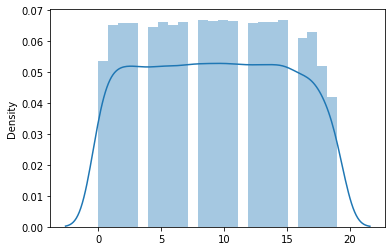

In [13]:
sns.distplot(groups.target)

In [14]:
from sklearn.feature_extraction.text import CountVectorizer

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

In [16]:
from sklearn.datasets import fetch_20newsgroups 

In [17]:
cv = CountVectorizer(stop_words='english',max_features=500)
groups = fetch_20newsgroups()
transformed = cv.fit_transform(groups.data)
print(cv.get_feature_names())

['00', '000', '0d', '0t', '10', '100', '11', '12', '13', '14', '145', '15', '16', '17', '18', '19', '1993', '1d9', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '34u', '35', '40', '45', '50', '55', '80', '92', '93', '__', '___', 'a86', 'able', 'ac', 'access', 'actually', 'address', 'ago', 'agree', 'al', 'american', 'andrew', 'answer', 'anybody', 'apple', 'application', 'apr', 'april', 'area', 'argument', 'armenian', 'armenians', 'article', 'ask', 'asked', 'att', 'au', 'available', 'away', 'ax', 'b8f', 'bad', 'based', 'believe', 'berkeley', 'best', 'better', 'bible', 'big', 'bike', 'bit', 'black', 'board', 'body', 'book', 'box', 'buy', 'ca', 'california', 'called', 'came', 'canada', 'car', 'card', 'care', 'case', 'cause', 'cc', 'center', 'certain', 'certainly', 'change', 'check', 'children', 'chip', 'christ', 'christian', 'christians', 'church', 'city', 'claim', 'clinton', 'clipper', 'cmu', 'code', 'college', 'color', 'colorado', 'columbia', '

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


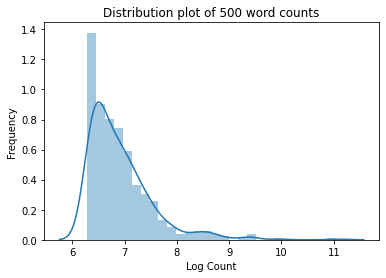

In [18]:
sns.distplot(np.log(transformed.toarray().sum(axis=0)))
plt.xlabel('Log Count')
plt.ylabel('Frequency')
plt.title('Distribution plot of 500 word counts')
plt.show()

## **Data Preprocessing**

In [19]:
from nltk.corpus import names
from nltk.stem import WordNetLemmatizer

In [20]:
def letters_only(astr) :
  return astr.isalpha()

In [22]:
cv = CountVectorizer(stop_words='english',max_features=500)
groups = fetch_20newsgroups()


In [23]:
import nltk
nltk.download('names')
cleaned=[]
all_names = set(names.words())
lemmatizer = WordNetLemmatizer()

[nltk_data] Downloading package names to /root/nltk_data...
[nltk_data]   Package names is already up-to-date!


In [24]:
import nltk
nltk.download('wordnet')
for post in groups.data:
    for word in post.split():
        if letters_only(word) and word not in all_names:
            cleaned.append(' '.join([lemmatizer.lemmatize(word.lower())]))

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


In [25]:
transformed = cv.fit_transform(cleaned)
print(cv.get_feature_names())

['able', 'accept', 'access', 'according', 'act', 'action', 'actually', 'add', 'address', 'ago', 'agree', 'algorithm', 'allow', 'american', 'anonymous', 'answer', 'anybody', 'apple', 'application', 'apr', 'arab', 'area', 'argument', 'armenian', 'article', 'ask', 'asked', 'assume', 'atheist', 'attack', 'attempt', 'available', 'away', 'bad', 'based', 'basic', 'belief', 'believe', 'best', 'better', 'bible', 'big', 'bike', 'bit', 'black', 'board', 'body', 'book', 'box', 'build', 'bus', 'business', 'buy', 'ca', 'california', 'called', 'came', 'car', 'card', 'care', 'carry', 'case', 'cause', 'center', 'certain', 'certainly', 'chance', 'change', 'check', 'child', 'chip', 'christian', 'church', 'city', 'claim', 'clear', 'clipper', 'code', 'college', 'color', 'come', 'coming', 'command', 'comment', 'common', 'communication', 'company', 'computer', 'computing', 'consider', 'considered', 'contact', 'control', 'controller', 'copy', 'correct', 'cost', 'country', 'couple', 'course', 'cover', 'create'

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


### **Clustering**

In [26]:
from nltk.corpus import names
from nltk.stem import WordNetLemmatizer
import nltk
nltk.download('names')
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.datasets import fetch_20newsgroups 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

[nltk_data] Downloading package names to /root/nltk_data...
[nltk_data]   Package names is already up-to-date!


In [27]:
def letters_only(astr) :
  return astr.isalpha()
cv = CountVectorizer(stop_words='english',max_features=500)
groups = fetch_20newsgroups()


In [28]:
import nltk
nltk.download('names')
cleaned=[]
all_names = set(names.words())
lemmatizer = WordNetLemmatizer()

[nltk_data] Downloading package names to /root/nltk_data...
[nltk_data]   Package names is already up-to-date!


In [29]:
import nltk
nltk.download('wordnet')
for post in groups.data:
    for word in post.split():
        if letters_only(word) and word not in all_names:
            cleaned.append(' '.join([lemmatizer.lemmatize(word.lower())]))

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [30]:
number_of_clusters = 20
transformed = cv.fit_transform(cleaned)
kmmodel = KMeans(n_clusters=number_of_clusters)
kmmodel.fit(transformed)

KMeans(n_clusters=20)

In [31]:
order_centroids = kmmodel.cluster_centers_.argsort()[:, ::-1]
terms = cv.get_feature_names()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [32]:
for i in range(number_of_clusters):
    print("Cluster %d:" % i),
    for ind in order_centroids[i, :10]:
        print(' %s' % terms[ind])
        plt.show()

Cluster 0:
 ha
 people
 know
 new
 time
 say
 right
 thing
 way
 problem
Cluster 1:
 try
 young
 free
 friend
 ftp
 function
 game
 general
 getting
 given
Cluster 2:
 think
 young
 got
 free
 friend
 ftp
 function
 game
 general
 getting
Cluster 3:
 university
 young
 good
 free
 friend
 ftp
 function
 game
 general
 getting
Cluster 4:
 use
 young
 good
 free
 friend
 ftp
 function
 game
 general
 getting
Cluster 5:
 wa
 young
 food
 form
 free
 friend
 ftp
 function
 game
 general
Cluster 6:
 make
 young
 good
 form
 free
 friend
 ftp
 function
 game
 general
Cluster 7:
 need
 young
 good
 free
 friend
 ftp
 function
 game
 general
 getting
Cluster 8:
 article
 young
 force
 free
 friend
 ftp
 function
 game
 general
 getting
Cluster 9:
 god
 young
 good
 form
 free
 friend
 ftp
 function
 game
 general
Cluster 10:
 good
 young
 form
 free
 friend
 ftp
 function
 game
 general
 getting
Cluster 11:
 tell
 young
 good
 form
 free
 friend
 ftp
 function
 game
 general
Cluster 12:
 going

### **Topic modelling using non-negative matrix factorization(NMF)**

In [33]:
from nltk.corpus import names
from nltk.stem import WordNetLemmatizer
import nltk
nltk.download('names')
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.datasets import fetch_20newsgroups 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.decomposition import NMF

[nltk_data] Downloading package names to /root/nltk_data...
[nltk_data]   Package names is already up-to-date!


In [34]:
def letters_only(astr) :
  return astr.isalpha()
cv = CountVectorizer(stop_words='english',max_features=500)
groups = fetch_20newsgroups()

In [35]:
import nltk
nltk.download('names')
cleaned=[]
all_names = set(names.words())
lemmatizer = WordNetLemmatizer()

[nltk_data] Downloading package names to /root/nltk_data...
[nltk_data]   Package names is already up-to-date!


In [36]:
import nltk
nltk.download('wordnet')
for post in groups.data:
    for word in post.split():
        if letters_only(word) and word not in all_names:
            cleaned.append(' '.join([lemmatizer.lemmatize(word.lower())]))

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [37]:
transformed = cv.fit_transform(cleaned)

In [38]:
d=20  # num topics
clf = NMF(n_components=d, random_state=1).fit(transformed)

/usr/local/lib/python3.7/dist-packages/sklearn/decomposition/_nmf.py:294: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  FutureWarning,


In [40]:
for topic_idex, topic in enumerate(clf.components_):
  label = '{} :'.format(topic_idex) 
  print(label, " ".join([cv.get_feature_names()[i]
                         for i in topic.argsort()[::]]))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


0 : able provide project program product probably private price previous pretty press president power posting posted post possible position political policy police point player play place phone personal person public period purpose quite sale said russian running run rule road right return result rest response research report reply remember religious religion reference recently reason really real reading read rate radio question san people pay mode mind million military method message men memory member medical mean maybe matter manager man making make major main mail machine low love lot lost looking look model pc money month past particular package output original order opinion open old office offer number note north nice news new network needed need near national nasa na muslim mouse moral monitor save saw say use usa unless unix university united unit understand type turn turkish trying try truth true tried total took told today tin time thought thinking think thing thanks used text